In [10]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Global Variables
Lib_Name = 'Lib_1' #UPDATE with library name or base name you want for your files
Fig_Format = 'jpeg' #UPDATE default graph file format

Seq_Rep_1 = 'path/to/rep1_Map3' #UPDATE pathway to seq rep 1 Map3 
Seq_Rep_2 = 'path/to/rep2_Map3' #UPDATE pathway to seq rep 2 Map3

Name_Rep1 = 'Rep1' #UPDATE default is rep1 but I like to change to sequencing index number 
Name_Rep2 = 'Rep2'#UPDATE default is rep2 but I like to change to sequencing index number 

#create summary tabble
summary_dict = {'Category': [], 'Read Count': []}

In [16]:
df1 = pd.read_csv(Seq_Rep_1) 
df2 = pd.read_csv(Seq_Rep_2)  

summary_dict['Category'].append(f'{Name_Rep1} Map3 Shape')
summary_dict['Read Count'].append(df1.shape[0])

summary_dict['Category'].append(f'{Name_Rep2} Map3 Shape')
summary_dict['Read Count'].append(df2.shape[0])

print(f'{Name_Rep1} Map3 Shape: {df1.shape[0]}')
print(f'{Name_Rep2} Map3 Shape: {df2.shape[0]}')

# Add a column to indicate the source DataFrame
df1['Source'] = Name_Rep1
df2['Source'] = Name_Rep2

combined_df = pd.concat([df1, df2]) 

summary_dict['Category'].append(f'Merged seq reps Map3 Shape')
summary_dict['Read Count'].append(combined_df.shape[0])

print(f'Merged df shape:{combined_df.shape[0]}')

unique_sequences = combined_df['Cat'].nunique()
unique_sequences_r1 = df1['Cat'].nunique()
unique_sequences_r2 = df2['Cat'].nunique()

summary_dict['Category'].append(f'{Name_Rep1} Map3 unique tile + bc1 combinations')
summary_dict['Read Count'].append(unique_sequences_r1)

summary_dict['Category'].append(f'{Name_Rep2} Map3 unique tile + bc1 combinations')
summary_dict['Read Count'].append(unique_sequences_r2)

summary_dict['Category'].append(f'Merged seq reps Map3 unique tile + bc1 combinations')
summary_dict['Read Count'].append(unique_sequences)

print(f"Number of unique tile + bc1 in {Name_Rep1} df: {unique_sequences_r1}")
print(f"Number of unique tile + bc1 in {Name_Rep2} df: {unique_sequences_r2}")
print(f"Number of unique tile + bc1 in merged df: {unique_sequences}")

#display(combined_df)

(1013437, 3)
combined df shape:
(2094936, 4)
The number of tb is25562
New DataFrame with all columns:


,Tiles,AD BCs,Cat,Source
0,GGCAGAAAGCTGGCCAGCACCACCCTGCCCGGCTATCCTCCTCACG...,GCACTGTTCAT,GGCAGAAAGCTGGCCAGCACCACCCTGCCCGGCTATCCTCCTCACG...,i21
1,CCTCCCGCCATCATCGACAAGACCTTCCAGGCCGGCATTCCCTTCA...,AAGGCCTTAAA,CCTCCCGCCATCATCGACAAGACCTTCCAGGCCGGCATTCCCTTCA...,i21
2,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,CTGCACTCTCC,GCCCAGGACCTGGCCGCCGCCACCTTCCAGGCCGGCATTCCCTTCA...,i21
3,GGCAGAGACCTGGCCAGCACCACCCTGCCCGGCTATCCTCCTCACG...,CACCACCCACG,GGCAGAGACCTGGCCAGCACCACCCTGCCCGGCTATCCTCCTCACG...,i21
4,GGCAGAGACCTGGCCAGCACCACCCTGCCCGGCTATCCTCCTCACG...,CACCAACATCA,GGCAGAGACCTGGCCAGCACCACCCTGCCCGGCTATCCTCCTCACG...,i21
...,...,...,...,...
1081494,GGCAGAGACCTGGCCAGCACCACCCTGCCCGGCTATCCTCCTCACG...,ACCCCTACGTA,GGCAGAGACCTGGCCAGCACCACCCTGCCCGGCTATCCTCCTCACG...,i20
1081495,TCTCCCGGCGCCTGTCCCTACGGCACACCCGCCTCTCCCTACAGCG...,ACCTTTTCTCC,TCTCCCGGCGCCTGTCCCTACGGCACACCCGCCTCTCCCTACAGCG...,i20
1081496,GGCAGAGACCTGGCCAGCACCACCCTGCCCGGCTATCCTCCTCACG...,CCCCTCTCCCA,GGCAGAGACCTGGCCAGCACCACCCTGCCCGGCTATCCTCCTCACG...,i20
1081497,GACCAGAGCAACAGAGCCGGCGTGACCAGCAGCAGCTTCTTCGCCG...,CCCGCGAACAT,GACCAGAGCAACAGAGCCGGCGTGACCAGCAGCAGCTTCTTCGCCG...,i20


In [4]:
combined_df.to_csv(f'{Lib_Name}_merged_Map3.csv', index=False) #UPDATE if you want a diff output file name for merged Map3

In [ ]:
# Filter out rows where bc1 maps to multiple tiles but will keep if 90% of the times the bc1 appears it is with 1 tile
grouped = combined_df.groupby('AD BCs')['Tiles'].value_counts().reset_index(name='count')
total_counts = grouped.groupby('AD BCs')['count'].sum().reset_index(name='total_count')
grouped = grouped.merge(total_counts, on='AD BCs')
grouped['percentage'] = grouped['count'] / grouped['total_count']
to_keep = grouped[grouped['percentage'] >= 0.9] #you can modify this to be more strigent but wouldn't make more permisive 
filtered_df = combined_df.merge(to_keep[['AD BCs', 'Tiles']], on=['AD BCs', 'Tiles'], how='inner')

# Count unique Tiles after filtering
final_unique_tiles = filtered_df['Tiles'].nunique()
final_unique_tbc1 = filtered_df['Cat'].nunique()

summary_dict['Category'].append(f'Merged Map3 unique Tiles after removing bc1 that map to multiple tiles <90% of the time')
summary_dict['Read Count'].append(final_unique_tiles)

summary_dict['Category'].append(f'Merged Map3 unique Tile + bc1 combinations after removing bc1 that map to multiple tiles <90% of the time')
summary_dict['Read Count'].append(final_unique_tbc1)


print(f"Number of Tiles after >90% map to 1 bc1 filter: {final_unique_tiles}")
print(f"Number of unique Tile + bc1 combinations after >90% map to 1 bc1 filter: {final_unique_tbc1}")

#filtered_df.to_csv(f'{Lib_Name}_merged_Map3_filtered.csv', index=False) #UPDATE uncomment if you want a filtered csv file made

In [7]:
#more stringent filter removing any barcodes that  map to multiple tiles 
# Group by 'AD BCs' and check if there's more than one unique 'Tiles' within each group
rows_to_remove = combined_df.groupby('AD BCs').filter(lambda x: x['Tiles'].nunique() > 1)

# Remove those rows from the original dataframe
stringent_filtered = combined_df.drop(rows_to_remove.index)

# Count unique Tiles after filtering
final_unique_tiles_2 = stringent_filtered['Tiles'].nunique()
final_unique_tbc1_2 = stringent_filtered['Cat'].nunique()

summary_dict['Category'].append(f'Merged Map3 unique Tiles after stringent')
summary_dict['Read Count'].append(final_unique_tiles_2)

summary_dict['Category'].append(f'Merged Map3 unique Tile + bc1 combinations after stringent')
summary_dict['Read Count'].append(final_unique_tbc1_2)


print(f"Number of Tiles after stringent filter: {final_unique_tiles_2}")
print(f"Number of unique Tile + bc1 combinations after stringent filter: {final_unique_tbc1_2}")

#stringent_filtered.to_csv(f'{Lib_Name}_merged_Map3_stringent_filtered.csv', index=False) #UPDATE uncomment if you want a stringent filtered csv file made

Number of sequences removed: 953415


(1141521, 4)

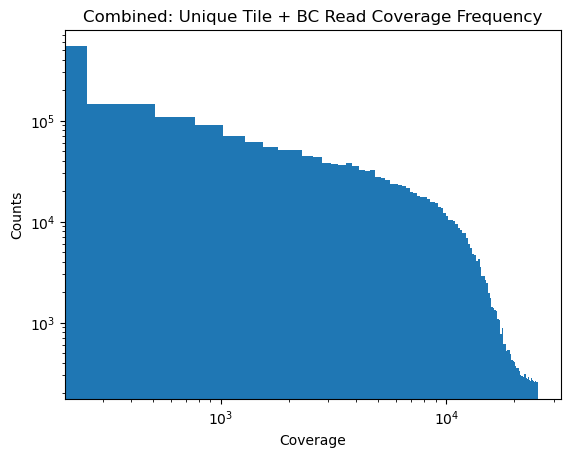

In [12]:
# plot tile+bc1 coverage on histogram LOG
def tbc_graph(data):
    plt.figure()
    plt.title(f'{Lib_Name }Merged: Unique Tile + BC Read Coverage Frequency')
    plt.hist(data['Cat'],  bins=100)
    plt.xlabel('Coverage')
    plt.ylabel('Counts')
    plt.xscale('log')
    plt.yscale('log')
    plt.savefig(f'{Lib_Name}_Unique_Tile_with_bc1', format=Fig_Format)
    plt.show()

tbc_graph()#UPDATE input filtered_df or stringent_filtered depending on what filtered df you want to use 

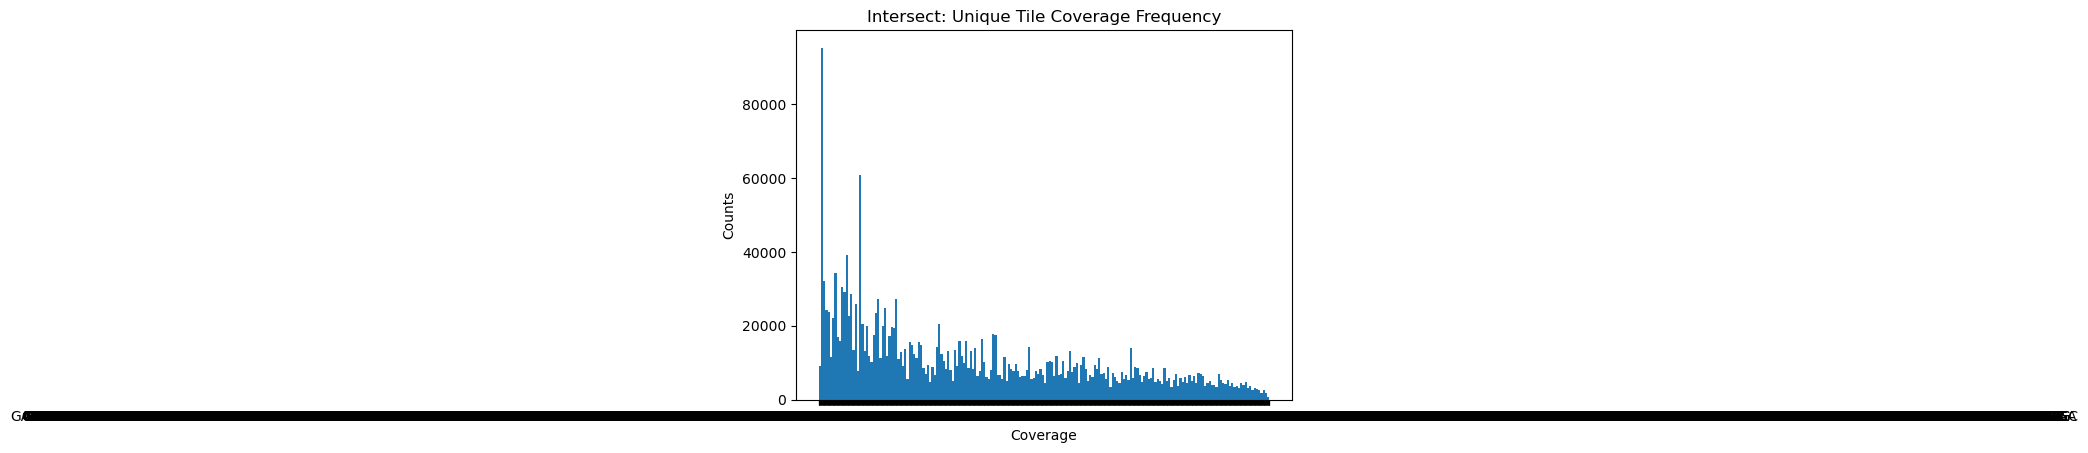

In [13]:
# plot tile coverage 
def tile_graph(data):   
    plt.hist(data['Tiles'], bins=200)
    plt.title('Intersect: Unique Tile Read Coverage Frequency')
    plt.xlabel('Coverage')
    plt.ylabel('Counts')
    plt.savefig(f'{Lib_Name}_Unique_Tiles', format=Fig_Format)
    plt.show()

tile_graph()#UPDATE input filtered_df or stringent_filtered depending on what filtered df you want to use 

In [ ]:
#create summary table
summary_dict_df = pd.DataFrame.from_dict(summary_dict)
summary_dict_df.to_csv(f'{Lib_Name}_Summary', index=False)